# Assessment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import Image

# 1a)

In [2]:
df = pd.read_csv('datasaurus.csv')
dataset_names = df["dataset"].unique()
for dataset_name in dataset_names:
    x = df.loc[df["dataset"] == dataset_name, "x"]
    y= df.loc[df["dataset"] == dataset_name, "y"]

    correlation = stats.pearsonr(x, y)[0]

    slope, intercept, _, _, _ = stats.linregress(x, y)

    print(f" {dataset_name} has the slope(b1) {round(slope, 3)} and the intercept (b0) {round(intercept,3)}, correlation: {round(correlation,3)}")

 dino has the slope(b1) -0.104 and the intercept (b0) 53.453, correlation: -0.064
 away has the slope(b1) -0.103 and the intercept (b0) 53.425, correlation: -0.064
 h_lines has the slope(b1) -0.099 and the intercept (b0) 53.211, correlation: -0.062
 v_lines has the slope(b1) -0.112 and the intercept (b0) 53.891, correlation: -0.069
 x_shape has the slope(b1) -0.105 and the intercept (b0) 53.554, correlation: -0.066
 star has the slope(b1) -0.101 and the intercept (b0) 53.327, correlation: -0.063
 high_lines has the slope(b1) -0.11 and the intercept (b0) 53.809, correlation: -0.069
 dots has the slope(b1) -0.097 and the intercept (b0) 53.098, correlation: -0.06
 circle has the slope(b1) -0.11 and the intercept (b0) 53.797, correlation: -0.068
 bullseye has the slope(b1) -0.11 and the intercept (b0) 53.809, correlation: -0.069
 slant_up has the slope(b1) -0.11 and the intercept (b0) 53.813, correlation: -0.069
 slant_down has the slope(b1) -0.111 and the intercept (b0) 53.85, correlation

# 1b)

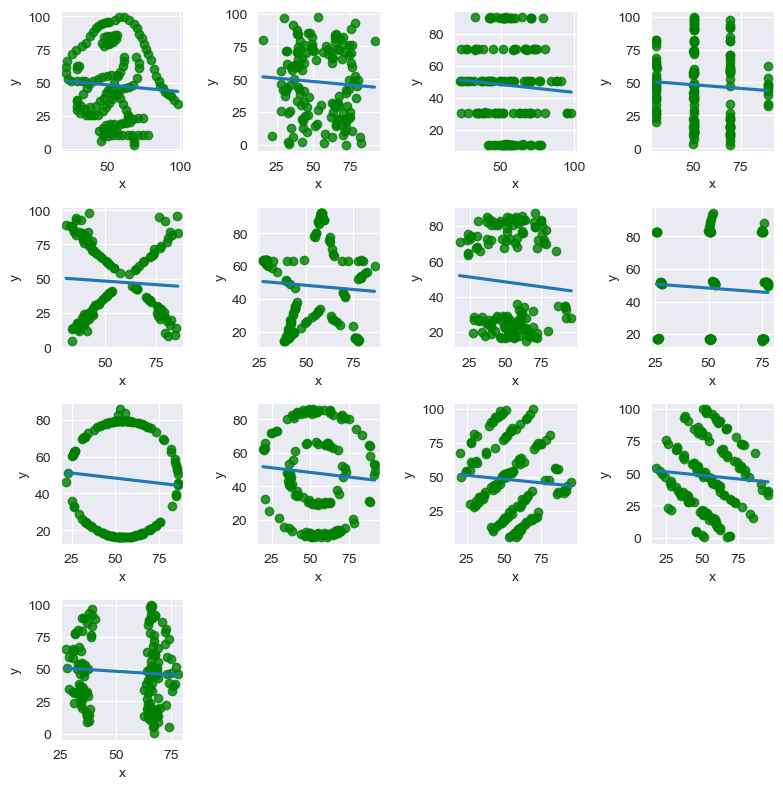

In [15]:
plt.figure(figsize=(8,8))
for i, dataset_name in enumerate(dataset_names, 1):
    x = df.loc[df["dataset"] == dataset_name, "x"]
    y = df.loc[df["dataset"] == dataset_name, "y"]

    plt.subplot(4, 4, i)
    sns.regplot(x=x, y=y, ci=None, scatter_kws={"color": "green"},)

plt.tight_layout()
plt.show()


# 1c)

One could split the groups again and for linear regression for sub groups of x and still staying with the linear regression, but this could falsify the results, as were taking away a lot of the context. So we could resort to polynomial regression see if that fits the non linear relationships better or not.




# 2
The Maximum I was able to achieve was 589.33, but if I were able to choose the B0 intersect freely a SSE could infinitely large. The inverse of this would be the having all the points on the line, which would make the SSE 0, which also acts as the smallest number possible when calculating 2d areas.

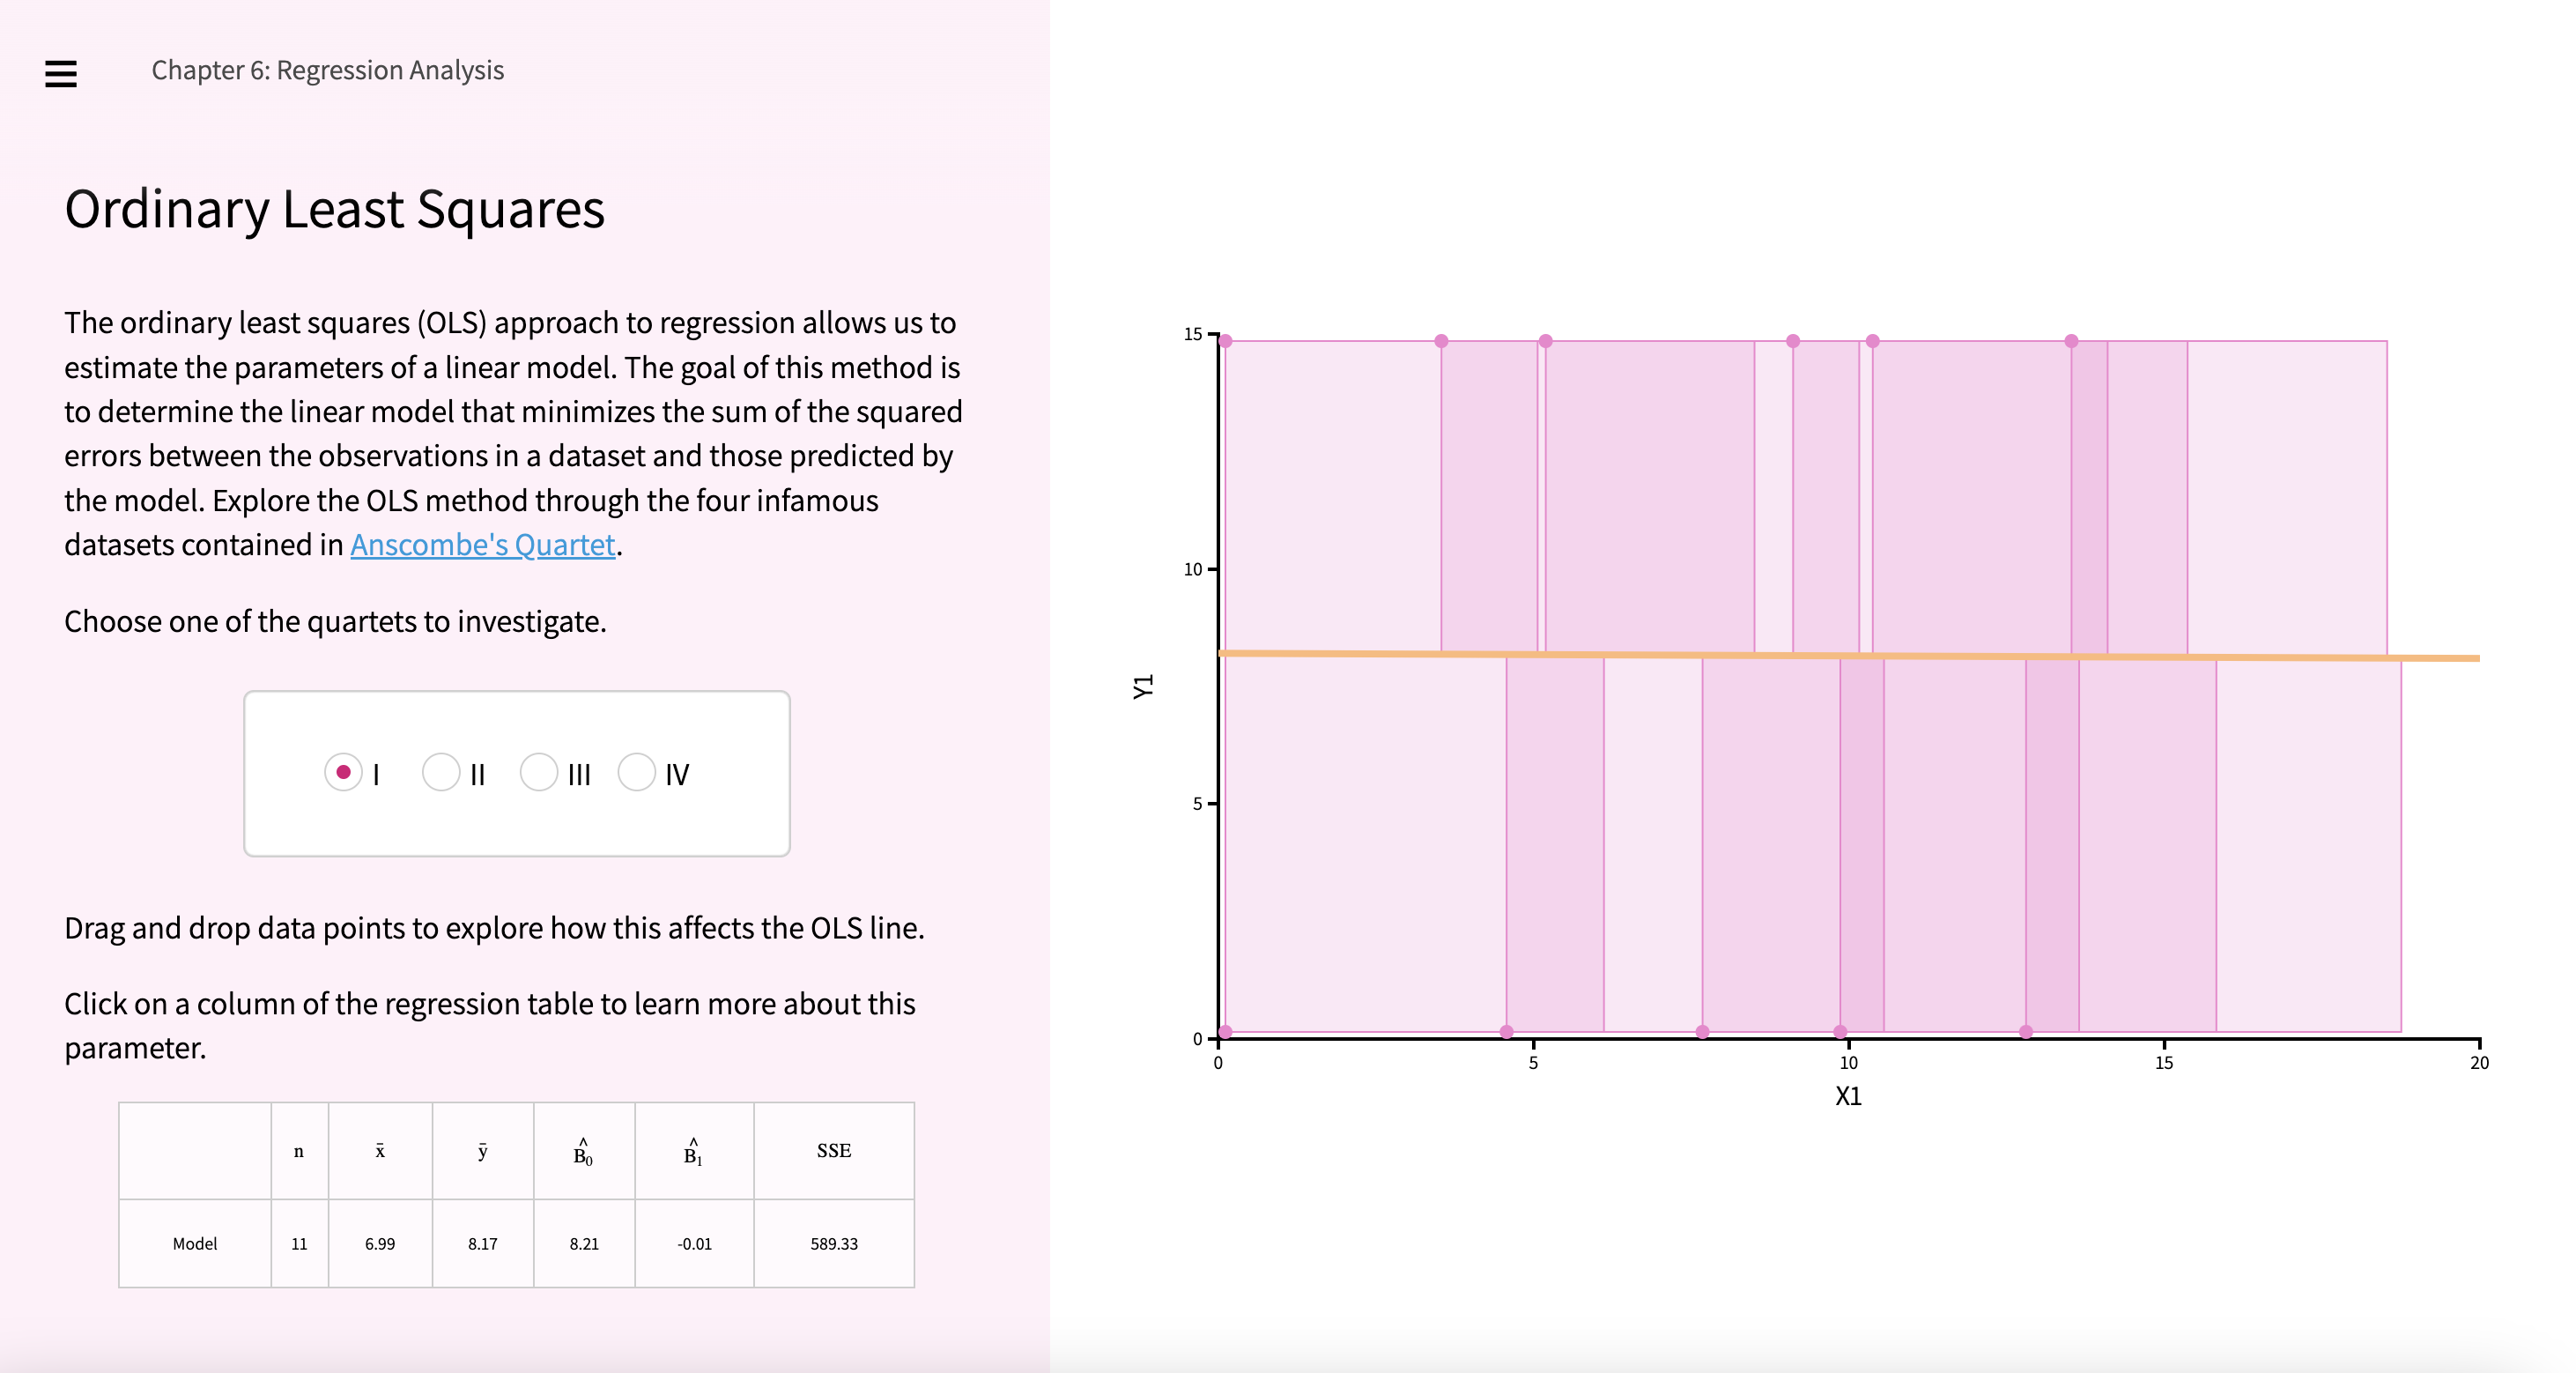

In [4]:
Image(filename="2a.png", width=700, height=300)

# 3)

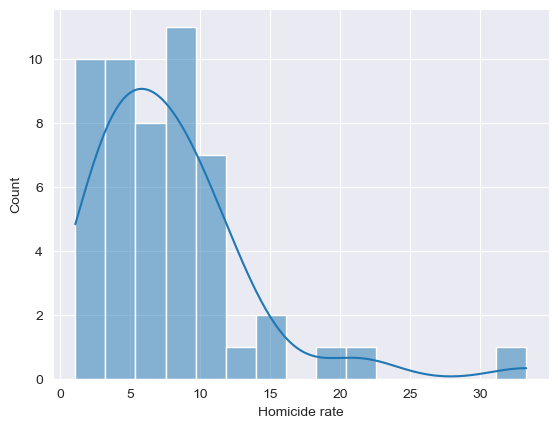

In [5]:
## Getting homicide rate:
df_hom = pd.read_csv('wikipedia_table.csv')
df_hom = df_hom["Homicide rate"]

sns.histplot(x=df_hom, bins=15, kde=True)
plt.show()

_As the data is skewed I will opt for the median instead of mean in further calculations_

### Bootstrapped confidence intervals

Bootstrapped 90% CI for Median (Bounds between 5% and 95%): (5.55, 8.25)


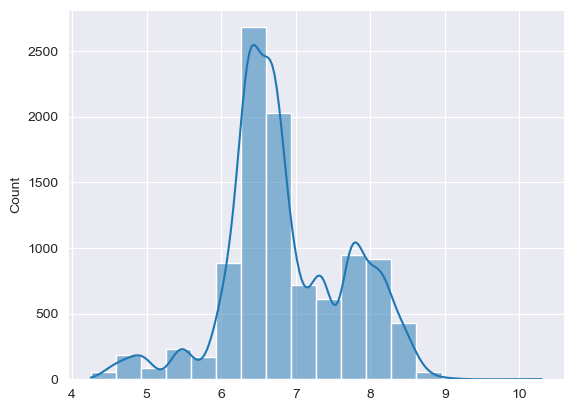

In [6]:
#Making the bootstrap function
def bootstrap(data, num_bootstrap=10000, confi_Inter=90):

    # choosing the bootstrap samples
    boot_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)

    #calculate the median fpr each sample
    boot_statistics = np.apply_along_axis(np.median, 1, boot_samples)

    # showing the plot of all the medians together
    sns.histplot(x=boot_statistics, bins=18, kde=True)

    # calculate the 90% confidence interval using all the bootstraps
    lower_bound = np.percentile(boot_statistics, (100 - confi_Inter) / 2)
    upper_bound = np.percentile(boot_statistics, 100 - (100 - confi_Inter) / 2)

    return lower_bound, upper_bound


# Get bootstrapped CIs for the median
boot_ci = bootstrap(df_hom)
print(f"Bootstrapped 90% CI for Median (Bounds between 5% and 95%): {boot_ci}")



### calculated confidence intervals (central limit theorem)

$$
CI = \bar{x} \pm Z_{\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}
$$

$\bar{x}is$ the sample mean

$Z_{\frac{\alpha}{2}}$is the Z score, showing how many standard deviations a point is from the mean

$s$being the standard deviation

$n$is the sample size

$\frac{s}{\sqrt{n}}$is the Stadard Error SE

Steps to take:
1. calculate the sample mean
2. calculate the standard deviation
3. take the Z-value
4. calculate the Standard Error (standard deviation / sample size)
5. Put everything together in the Formula

In [7]:
# The mean Sum of values divided by the count of all values
x_bar = df_hom.mean()
# the standard deviation, the square root of the squared sum of each value minus the mean which is then devided by n, the count of all values
s = df_hom.std()
# The Z value, the inverse normal of 1- the confidence level
confidence_level = 0.90
alpha = 1 - confidence_level
z_value = stats.norm.ppf(1 - alpha / 2)

# The standard error, standard deviation devided by the square root of the sample size
se = s/(np.sqrt(len(df_hom)))

CI_upper = x_bar +z_value*se
CI_lower = x_bar - z_value*se

print(f"The confidence interval is {CI_lower} and {CI_upper}.")

The confidence interval is 6.538893574777065 and 9.153414117530627.


## 4)

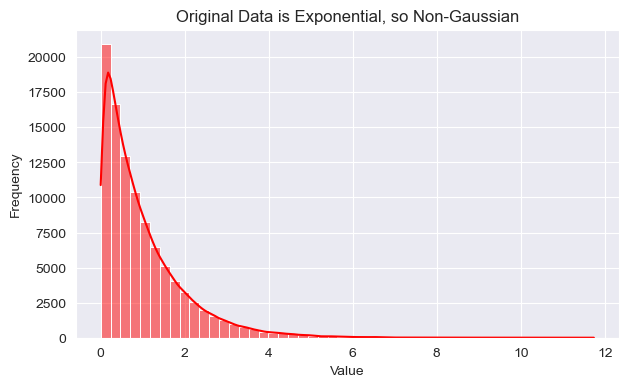

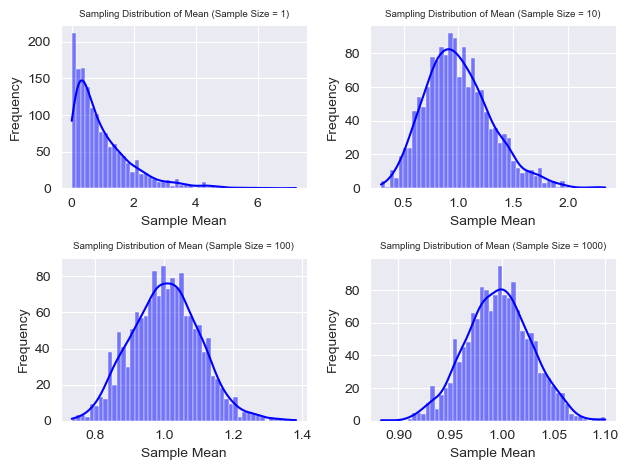

0.9959701590561848

In [8]:
# Generating a clearly non gaussian distribution with a big sample size, this code works for any artificial dataset, i chose exponential for the very obvious change to the normal distribution and the non obvious mean
np.random.seed(42)
data = np.random.exponential(size=100000)

plt.figure(figsize=(7, 4))
sns.histplot(data, bins=50, kde=True, color='red')
plt.title("Original Data is Exponential, so Non-Gaussian")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# For demonstration purposes
sample_size = [1, 10, 100, 1000]
num_samples = 1500


for num, sample_size in enumerate(sample_size, 1):
    sample_means = [np.mean(np.random.choice(data, sample_size)) for i in range(num_samples)]

    plt.subplot(2, 2, num)
    sns.histplot(sample_means, bins=50, kde=True, color='blue')
    plt.title(f"Sampling Distribution of Mean (Sample Size = {sample_size})", size=7)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# The mean should be around the maximum of our plotted sample means (Here du to hvaing a seed it should be around 1)
data.mean()


### Why does this demonstrate the central limit theorem?

Our graphs and quick calculations prove the central limit theorem, as the data that we generated is not normally distributed and that when increasing the size of our sample means we move closer to a normally distributed distribution. As the maximum of our sample distributions always moves closer to 0.996 as size increases, we know our calculations and the CLT holds true. So regardless of the original distribution of the data as long as it contains enough data points we know that random samples will have approximately normal distributions.

## 5)

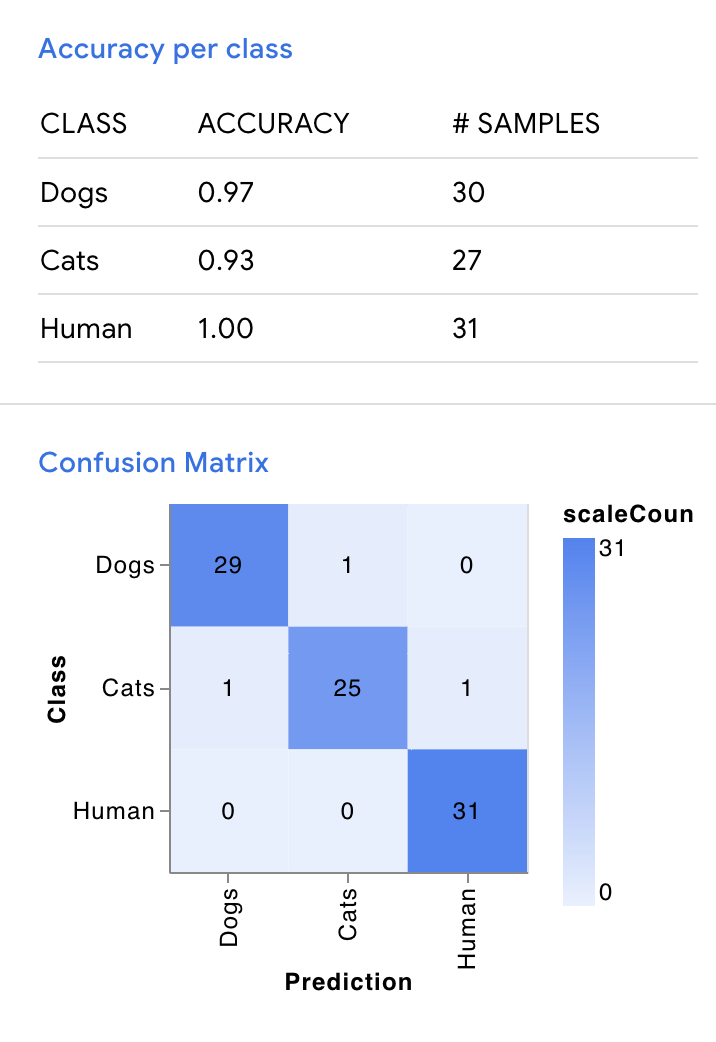

In [32]:
Image(filename="ConfusionMatrix.png", width=500, height=600)

The model got the following Accuracy scores:
1. Dogs: 0.97, with 30 samples, only one dog being misclassified as a cat - 1 False positive
2. Cats: 0.93, with 27 samples, being wrong twice, once classifying a cat as a human and once as a dog - 2 False Positive
3. Human: 1.00, with 31 samples, getting everything correct - 0 False positives

The cats performing the worst could have to do with only having 178 samples compared to the dogs 196 and humans 204 samples.
Also it could also be that dark black or snow white cats create issues for image classification algorithms, as they are very sensitive to lighting and may have issues with extremes. So it may sometimes be that only the eyes are properly visible



## 6)

P(G)= 0.05 - of suspects are guilty <br>
P(JG|G) = 0.9  - guilty of the guilty subjects are judged properly <br>
P(In) = 0.95 - of suspects are innocent <br>
P(JG | In) = 0.01 - of innocent suspects are misjudged as guilty <br>


If the suspect was selected from a group of suspects of which only 5%
 have ever committed a crime, and the court indicates that he is guilty, what is the
probability that he is innocent? Is the court any good at giving good judgements?

So we are looking for P(I | JG) - the suspect is innocent but it was given that he was perviosly judged as guilty - the opposite of P (JG | In) - P(In|JG)

We need to use Baye's rule as we're interested in the probability with posterior information

Bayes' rule generally:
$$
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
$$
In our Case:
$$
P(In | JG) = \frac{P(JG | In) P(In)}{P(JG)}
$$

But we still need P(JG) - which is simply obtainable with the law of total probability
$$
P(JG) = P(JG|G)\times P(G) + P(JG| IN)\times P(In)
$$




In [10]:
PG = 0.05
PJG_G = 0.9
PIn = 0.95
PJG_In =0.01

PJG = PJG_G * PG + PJG_In * PIn

PIn_JG =(PJG_In * PIn) / PJG
PIn_JG

0.17431192660550457

## 7)

An excellent example of the Campbell-Goodhart Law, in my opinion, is the current policy of US President Trump, such as his tariffs, which should reduce the trade deficit and strengthen the economy, but it basically focuses entirely on the said trade deficit, ignoring the impact on small and medium-sized enterprises that will struggle to import goods for manufacturing, especially in the agricultural and automotive sectors. This could potentially lead to the exact opposite of the hoped-for outcome, as this economic plan is overly focused on eliminating the trade deficit, making it a poor metric.

## 8)

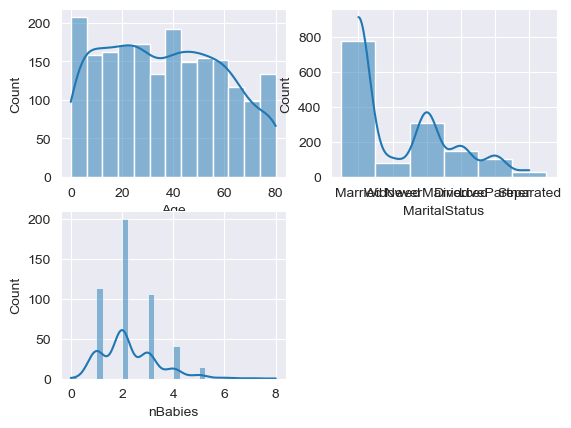

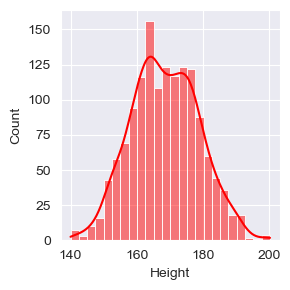

In [31]:
df_NH = pd.read_csv('NHANES-2000.csv')

variables = ["Age", "MaritalStatus", "nBabies"]
height_over_19 = df_NH[df_NH["Age"] > 19]["Height"]

for i, variable in enumerate(variables, 1):

    plt.subplot(2, 2, i)
    sns.histplot(df_NH[variable], alpha=0.5, label=variable, kde=True)


plt.figure(figsize=[3,3])
sns.histplot(height_over_19, kde=True, color='red')

plt.tight_layout()
plt.show()

1. Age — seems equally distributed
2. Marital status — As it is categorically distributed it can not be treated to the same distributions as discrete or continuous data
3. Babies —make sense to model it after a poisson distribution as the x- axis is time and is mostly constant and the events are independent
4. Height over 19 — as to be expected height is normally distributed, as it is very likely that one is averagely tall

## 9)

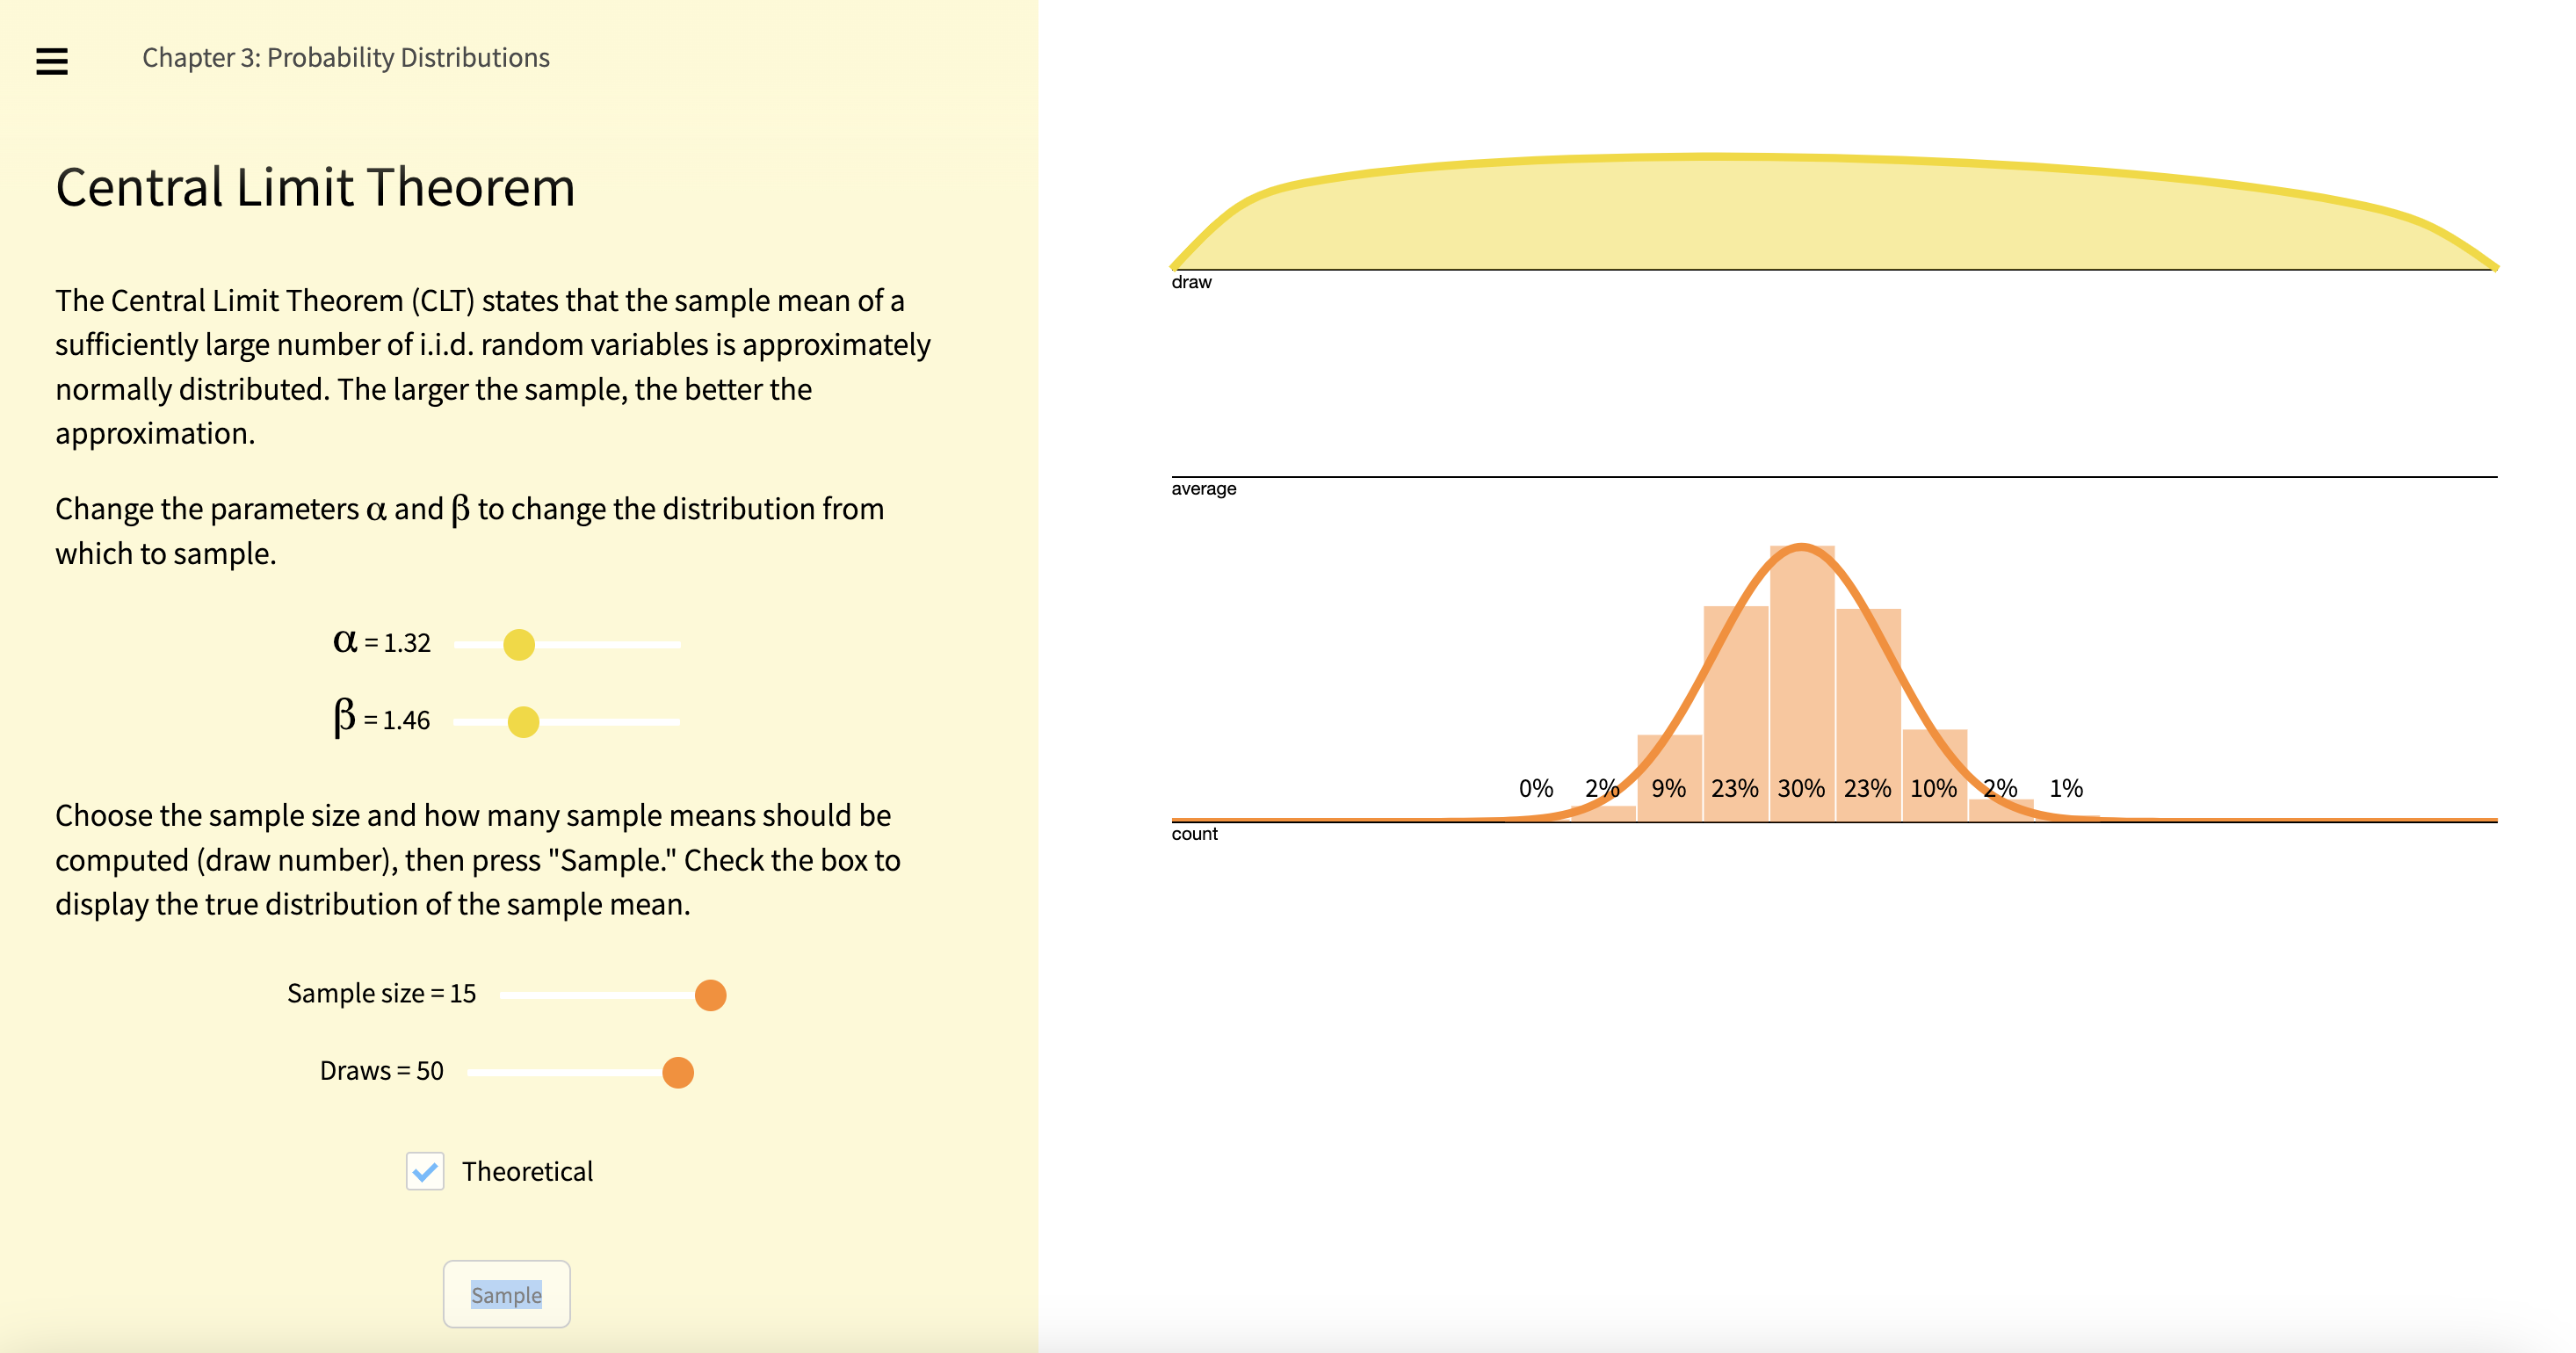

In [12]:
## a)
Image(filename="normalDist.png", width=800, height=400)

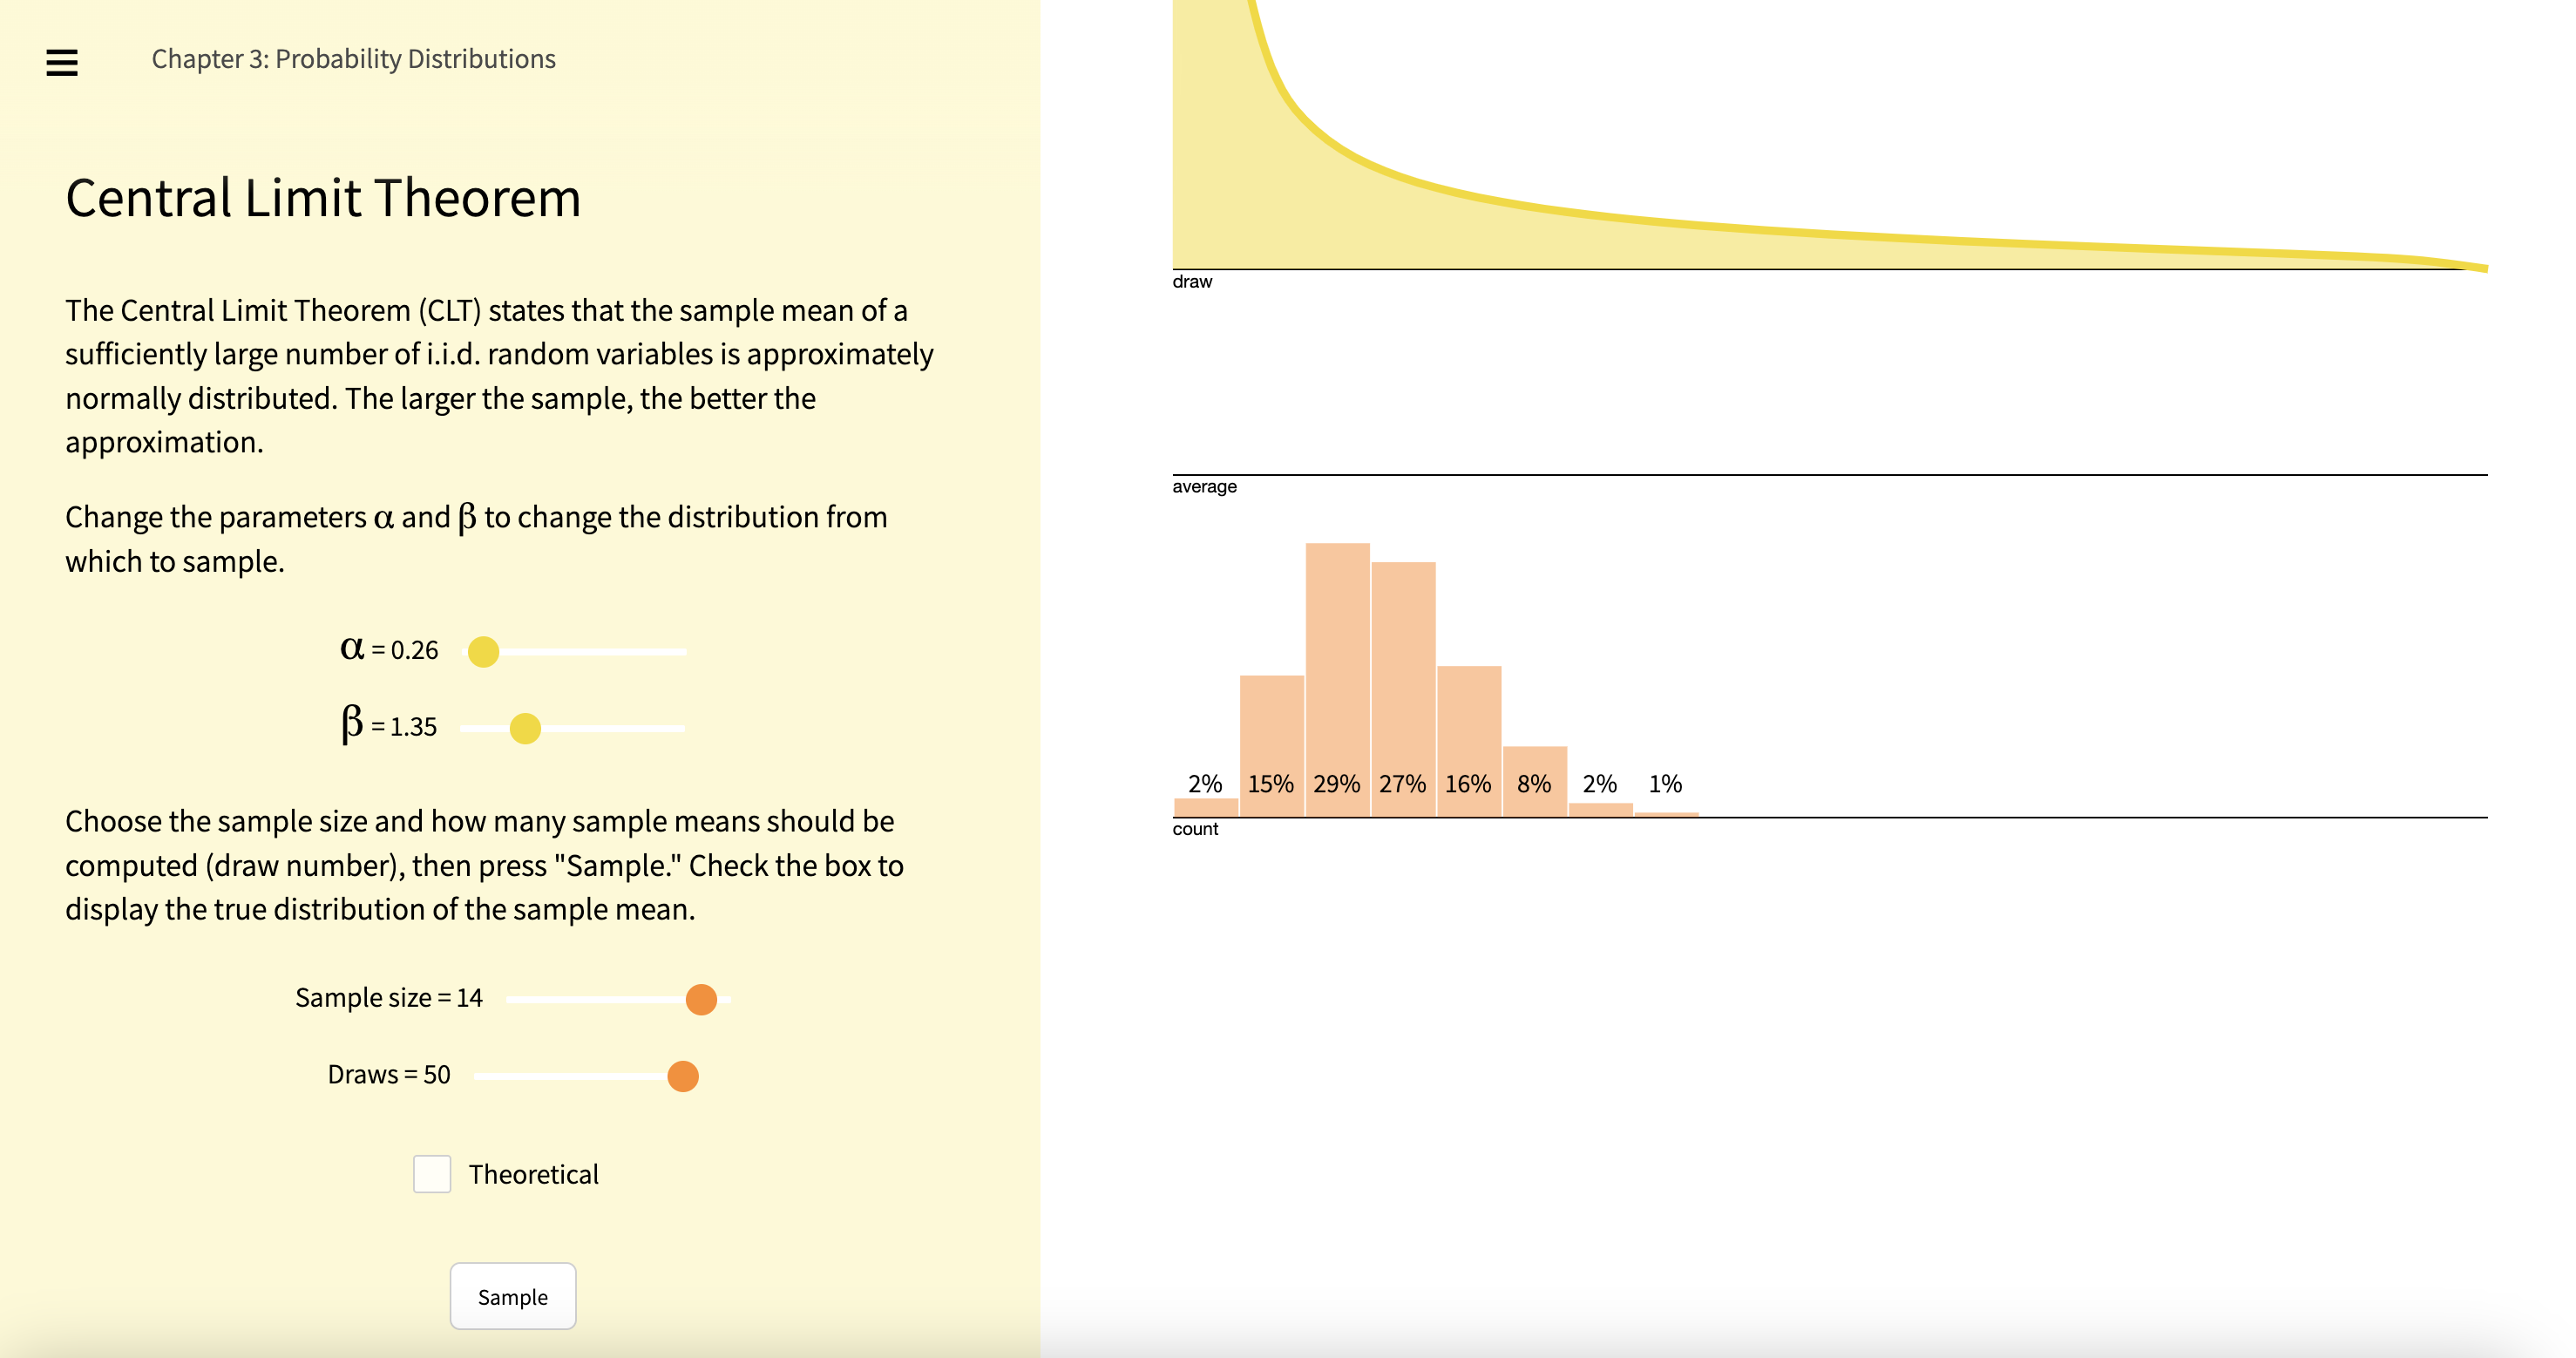

In [13]:
##  b)
Image(filename="poissonDist.png", width=800, height=400)